<a href="https://colab.research.google.com/github/Anne340/Moringa_Core_Wk4/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_04_Anne_Nyambura_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IP Week 4 Core##

#1. Defining the Question

##a) Specifying the Data Analytic question
To test the null hypothesis which is:

Null hypothesis- the number of blue cars taken is more than those returned on weekdays

Alternate hypothesis- the number of blue cars returned is more than those taken on weekdays


##b) Defining the Metric for Success
For us to be able to answe the data analytic question successfuly, we must cover:
Exploratory data analysis
Univariate analysis
Bivariate analysis
Hypothesis Testing

##c) Understanding the context
To test the null hypothesis. We will do this by calculating the zscore and with this, identify the p-value and make our decision by using strata from the postal code column 

## d) Recording the experimental design
We will carry out the following steps in the analysis

Import the necessary libraries for analyis

Reading the data in the dataset

Carry out data cleaning

Carrying out univariate analysis

Carrying out bivariate analysis

Carrying out hypothesis testing

Suggesting necessary conclusions and recommendations

## e) Data relevance
The necessary columns we require for the study are: 

Postal code	
dayOfWeek	
day_type	
BlueCars_taken_sum	
BlueCars_returned_sum

The dataset we are using can be found in these links:
http://bit.ly/DSCoreAutolibDataset
http://bit.ly/DSCoreAutolibDatasetGlossary

## Importing Libraries

In [383]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats
from scipy import stats

## Loading the dataset

In [384]:
# Loading the dataset
df = pd.read_csv('autolib_daily_events_postal_code.csv')

## Checking the data

In [385]:
# Preview our dataset 
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [386]:
# Preview our dataset 
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [387]:
# Checking data type information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [388]:
# Checking the number of rows and columns contained in our dataset
df.shape

(16085, 13)

In [389]:
# Displaying basic statistics in the numerical columns in the dataset
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [390]:
# display the unique values in the dataframe
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [391]:
# display the unique values in the day_type column
print(df['day_type'].value_counts())

weekday    11544
weekend     4541
Name: day_type, dtype: int64


In [392]:
# Checking for the values in the postal code column
print(df['Postal code'].value_counts())

75001    156
92700    156
93350    156
93310    156
93260    156
        ... 
93440    151
93370    149
92340    147
93200    126
93390     84
Name: Postal code, Length: 104, dtype: int64


## Cleaning the dataset

In [393]:
#Checking for null values in the dataset
print(df.isnull().sum())

# Dropping null values in the dataset
df.dropna()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [394]:
# Change the date column into date time
df['date'] = pd.to_datetime(df['date'])
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,2018-06-17,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,3,5,2,2,0,0


In [395]:
# Drop columns we don't need
df = df.drop(columns = ['n_daily_data_points', 'date', 'Utilib_taken_sum',	'Utilib_returned_sum',	'Utilib_14_taken_sum',	'Utilib_14_returned_sum', 'Slots_freed_sum',	'Slots_taken_sum', ], axis=1)
df.head()

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


In [396]:
# Checking and dropping any duplicated rows
df.duplicated()
df.drop_duplicates(inplace = True)
df.head()

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


In [397]:
# Remove white spaces
df.columns.str.replace(' ', '_')
df.head()

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


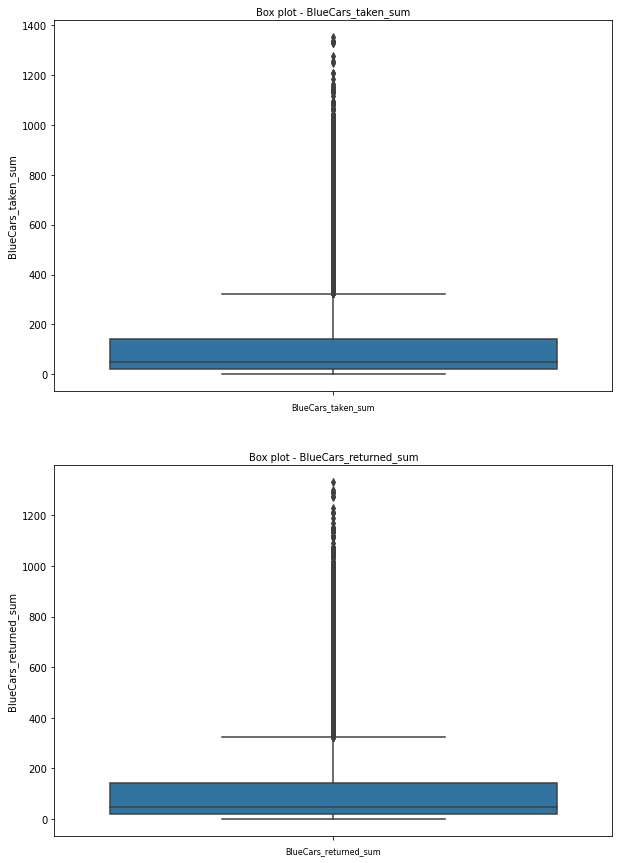

In [398]:
# Checking for outilers with numerical values
col_names = ['BlueCars_taken_sum',	'BlueCars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [399]:
# # Dropping the outliers
# # Finding the IQR
# q1_1 = df['BlueCars_taken_sum'].quantile(0.25)
# q3_1 = df['BlueCars_taken_sum'].quantile(0.75)

# iqr_1 = q3_1 - q1_1
# upper_limit1 = q3_1 + 1.5 * iqr_1
# lower_limit1 = q1_1 - 1.5 * iqr_1
# df[df['BlueCars_taken_sum']> upper_limit1]
# df[df['BlueCars_taken_sum']< lower_limit1]
# df = df[df['BlueCars_taken_sum'] < upper_limit1]

# q1_2 = df['BlueCars_returned_sum'].quantile(0.25)
# q3_2 = df['BlueCars_returned_sum'].quantile(0.75)

# iqr_2 = q3_2 - q1_1
# upper_limit2 = q3_2 + 1.5 * iqr_2
# lower_limit2 = q1_2 - 1.5 * iqr_2
# df[df['BlueCars_returned_sum']> upper_limit2]
# df[df['BlueCars_returned_sum']< lower_limit2]
# df = df[df['BlueCars_returned_sum'] < upper_limit2]

# q1_3 = df['Slots_freed_sum'].quantile(0.25)
# q3_3 = df['Slots_freed_sum'].quantile(0.75)

# iqr_3 = q3_3 - q1_3
# upper_limit3 = q3_3 + 1.5 * iqr_3
# lower_limit3 = q1_3 - 1.5 * iqr_3
# df[df['Slots_freed_sum']> upper_limit3]
# df[df['Slots_freed_sum']< lower_limit3]
# df = df[df['Slots_freed_sum'] < upper_limit3]


# q1_4 = df['Slots_taken_sum'].quantile(0.25)
# q3_4 = df['Slots_taken_sum'].quantile(0.75)

# iqr_4 = q3_4 - q1_4
# upper_limit4 = q3_4 + 1.5 * iqr_4
# lower_limit4 = q1_4 - 1.5 * iqr_4
# df[df['Slots_taken_sum']> upper_limit4]
# df[df['Slots_taken_sum']< lower_limit4]
# df = df[df['Slots_taken_sum'] < upper_limit4]

# df.head()


##Univariate Analysis

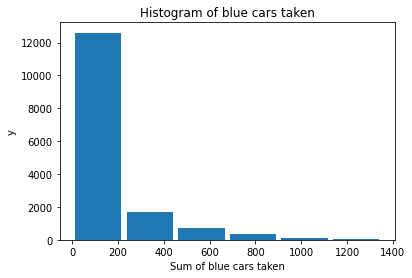

In [400]:
# Plotting a histogram showing bluecars taken
cars_taken = df['BlueCars_taken_sum']

plt.hist(cars_taken, bins = 6, histtype='bar', rwidth=0.9)
plt.xlabel('Sum of blue cars taken')
plt.ylabel('y')
plt.title('Histogram of blue cars taken')
plt.show()

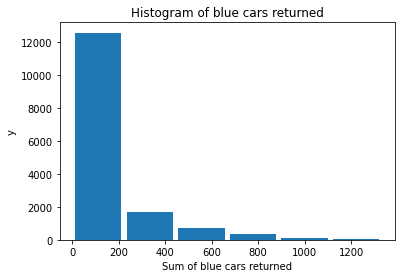

In [401]:
# Plotting a Histogram showing bluecars returned
cars_returned = df['BlueCars_returned_sum']

plt.hist(cars_returned, bins = 6, histtype='bar', rwidth=0.9)
plt.xlabel('Sum of blue cars returned')
plt.ylabel('y')
plt.title('Histogram of blue cars returned')
plt.show()

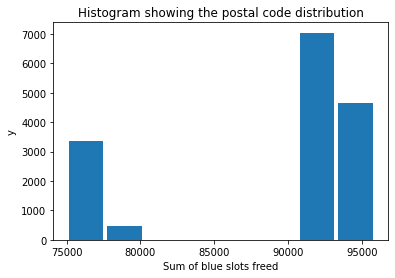

In [402]:
# Plotting a showing postal code distribution
slots_taken = df['Postal code']

plt.hist(slots_taken, bins = 8, histtype='bar', rwidth=0.9)
plt.xlabel('Sum of blue slots freed')
plt.ylabel('y')
plt.title('Histogram showing the postal code distribution')
plt.show()

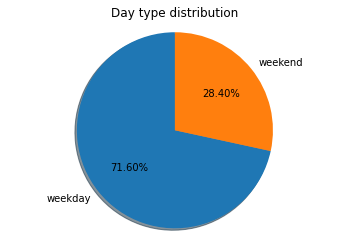

In [403]:
# Pie chart showing the distribution of the type of days
day_type = df.groupby(['day_type'])['dayOfWeek'].count()


plt.pie(day_type, labels = day_type.index, autopct = '%2.2f%%', shadow = True, startangle = 90)

plt.axis('equal')
plt.title('Day type distribution')
plt.show()

##Bivariate Analysis

In [404]:
df.head()

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


<function matplotlib.pyplot.show>

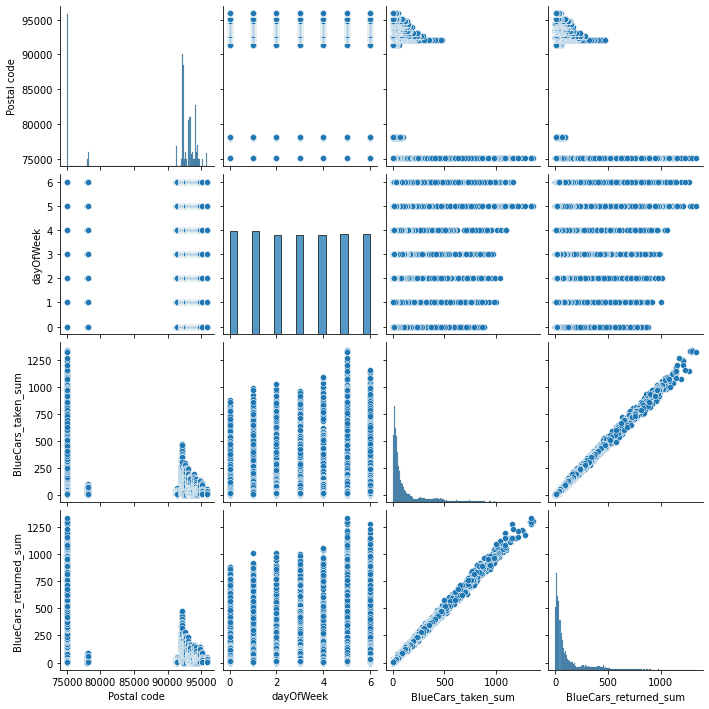

In [405]:
# Plotting a pairplot to summarize and record our observations
sns.pairplot(df)
plt.show

In [406]:
# Getting the correlation coefficient between the blue cars taken and those returned
df['BlueCars_taken_sum'].corr(df['BlueCars_returned_sum'])

0.9986456261388664

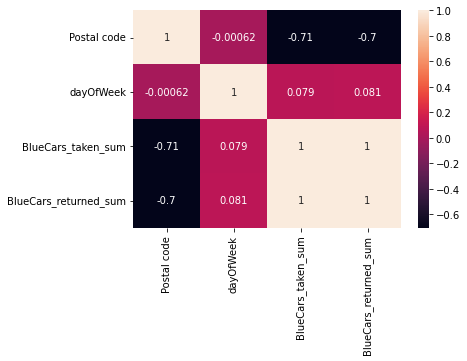

In [407]:
# Plotting a correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

##Hypothesis Testin
Null hypothesis: The number of blue cars taken is greater than the number of bluecars returned on weekdays

In [408]:
df.head()

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


In [409]:
# Seperating the row values by weekdays so that we can analyze the data
day_type_df = df[df['day_type']== 'weekday']
day_type_df.count()

Postal code              11092
dayOfWeek                11092
day_type                 11092
BlueCars_taken_sum       11092
BlueCars_returned_sum    11092
dtype: int64

In [410]:
# Dividing the data into a strata in relation to the available postal codes
strat_output = day_type_df.groupby('Postal code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
print(strat_output['Postal code'].value_counts())

75001    11
92400    11
93170    11
93130    11
93110    11
         ..
93370     8
93440     8
94100     8
75112     7
93390     5
Name: Postal code, Length: 104, dtype: int64


In [411]:
print(strat_output)

       Postal code  dayOfWeek day_type  BlueCars_taken_sum  \
89           75001          1  weekday                 112   
133          75001          0  weekday                  96   
57           75001          4  weekday                 136   
7            75001          0  weekday                  84   
134          75001          1  weekday                 142   
...            ...        ...      ...                 ...   
16073        95880          4  weekday                  11   
16024        95880          0  weekday                  17   
16064        95880          2  weekday                  11   
16046        95880          1  weekday                  24   
15973        95880          2  weekday                  13   

       BlueCars_returned_sum  
89                       111  
133                       94  
57                       137  
7                         83  
134                      141  
...                      ...  
16073                      9  
16024  

In [412]:
# Population mean
population_mean = df['BlueCars_taken_sum'].mean()
population_mean

129.69197004905757

In [413]:
# Sample mean
taken_mean = strat_output['BlueCars_taken_sum'].mean()
taken_mean

118.3155031731641

In [414]:
returned_mean = strat_output['BlueCars_returned_sum'].mean()
returned_mean

117.81867633726202

In [415]:
bluecars_std = strat_output['BlueCars_taken_sum'].std()
bluecars_std

168.8663928232382

In [416]:
# finding the z-score for bluecars taken on weekends
z_score = (taken_mean - population_mean) / bluecars_std
print(z_score)

# Finding the p-values
p_value = stats.norm.cdf(z_score)
print(p_value)

-0.06736963279485604
0.47314372188368975


In [417]:
# Interpreting the p-value
if p_value > 0.05:
  print("We fail to reject the null hypothesis")
elif p_value <= 0.05:
  print("We reject the null hypothesis")

We fail to reject the null hypothesis


Since our p-value is greater than the level of significance that means we fail to reject our null hypothesis.

The recommendations and conclusions will be found in our documentation